<a href="https://colab.research.google.com/github/Hanyan-Wu/MachineLearningLab/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/ColabNotebooks/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1.) US perm Visas csv from cycle using zip extractor


In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [5]:
df.isna().sum()

add_these_pw_job_title_9089      332168
agent_city                       162908
agent_firm_name                  167365
agent_state                      166123
application_type                 239093
                                  ...  
wage_offer_to_9089               300728
wage_offer_unit_of_pay_9089      115916
wage_offered_from_9089           259715
wage_offered_to_9089             343347
wage_offered_unit_of_pay_9089    303663
Length: 154, dtype: int64

In [6]:
df.pw_amount_9089

0            75629.0
1            37024.0
2            47923.0
3              10.97
4            94890.0
             ...    
374357     28,330.00
374358    107,744.00
374359     79,082.00
374360     37,981.00
374361     84,926.00
Name: pw_amount_9089, Length: 374362, dtype: object

# 2.) Choose 4 features you think are important. Case_status is your target variable


In [7]:
# Find the columns with the least NaNs
na_count = df.isna().sum().sort_values()
least_na_columns = na_count.index[:20]
least_na_columns

Index(['decision_date', 'case_status', 'employer_name', 'employer_city',
       'employer_postal_code', 'employer_address_1', 'employer_state',
       'job_info_work_city', 'job_info_work_state', 'pw_soc_code',
       'pw_unit_of_pay_9089', 'pw_source_name_9089', 'pw_amount_9089',
       'pw_soc_title', 'country_of_citizenship', 'class_of_admission',
       'pw_level_9089', 'wage_offer_from_9089', 'wage_offer_unit_of_pay_9089',
       'case_number'],
      dtype='object')

In [8]:
na_count.head(20)

decision_date                       0
case_status                         0
employer_name                      12
employer_city                      14
employer_postal_code               37
employer_address_1                 42
employer_state                     42
job_info_work_city                102
job_info_work_state               103
pw_soc_code                       397
pw_unit_of_pay_9089              1572
pw_source_name_9089              2099
pw_amount_9089                   2216
pw_soc_title                     2336
country_of_citizenship          20633
class_of_admission              22845
pw_level_9089                   27627
wage_offer_from_9089           114771
wage_offer_unit_of_pay_9089    115916
case_number                    135269
dtype: int64

In [9]:
df_select = df[['case_status', 'class_of_admission', 'country_of_citizenship', 'pw_amount_9089']].dropna()
df_select

,case_status,class_of_admission,country_of_citizenship,pw_amount_9089
20577,Certified-Expired,EWI,ECUADOR,12.87
20578,Certified,H-1B,INDIA,95498.0
20579,Certified,L-1,PHILIPPINES,105685.0
20580,Certified-Expired,H-1B,INDIA,97427.0
20581,Certified,H-1B,INDIA,101505.0
...,...,...,...,...
374356,Withdrawn,H-1B,CHINA,"142,938.00"
374358,Withdrawn,L-1,VIETNAM,"107,744.00"
374359,Withdrawn,H-1B,INDIA,"79,082.00"
374360,Withdrawn,B-2,SOUTH KOREA,"37,981.00"


# 3.) Clean your data for a decision tree


In [10]:
X = pd.get_dummies(df_select, columns=['class_of_admission', 'country_of_citizenship']).drop(['case_status'], axis= 1)
y = df_select['case_status']

In [11]:
X['pw_amount_9089'] = X['pw_amount_9089'].astype(str)
X['pw_amount_9089'] = X['pw_amount_9089'].str.replace(',', '')
X['pw_amount_9089'] = X['pw_amount_9089'].astype(float)
X

,pw_amount_9089,class_of_admission_A-3,class_of_admission_A1/A2,class_of_admission_AOS,class_of_admission_AOS/H-1B,class_of_admission_B-1,class_of_admission_B-2,class_of_admission_C-1,class_of_admission_C-3,class_of_admission_D-1,...,country_of_citizenship_UNITED STATES OF AMERICA,country_of_citizenship_URUGUAY,country_of_citizenship_UZBEKISTAN,country_of_citizenship_VANUATU,country_of_citizenship_VENEZUELA,country_of_citizenship_VIETNAM,country_of_citizenship_YEMEN,country_of_citizenship_YUGOSLAVIA,country_of_citizenship_ZAMBIA,country_of_citizenship_ZIMBABWE
20577,12.87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20578,95498.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20579,105685.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20580,97427.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20581,101505.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374356,142938.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374358,107744.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
374359,79082.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374360,37981.00,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y

20577     Certified-Expired
20578             Certified
20579             Certified
20580     Certified-Expired
20581             Certified
                ...        
374356            Withdrawn
374358            Withdrawn
374359            Withdrawn
374360            Withdrawn
374361            Withdrawn
Name: case_status, Length: 330517, dtype: object

# 4.) Fit and plot a decision tree of depth 3


In [13]:
from sklearn import tree

In [14]:
clf = tree.DecisionTreeClassifier(max_depth= 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'pw_amount_9089 <= 47590.199\ngini = 0.586\nsamples = 330517\nvalue = [160559, 137412, 17328, 15218]\nclass = Certified-Expired'),
 Text(0.25, 0.625, 'class_of_admission_H-1B <= 0.5\ngini = 0.658\nsamples = 34548\nvalue = [15247, 12126, 4750, 2425]\nclass = Certified-Expired'),
 Text(0.125, 0.375, 'class_of_admission_EWI <= 0.5\ngini = 0.673\nsamples = 18427\nvalue = [8348, 5436, 3068, 1575]\nclass = Certified-Expired'),
 Text(0.0625, 0.125, 'gini = 0.666\nsamples = 17157\nvalue = [8007, 5002, 2618, 1530]\nclass = Certified-Expired'),
 Text(0.1875, 0.125, 'gini = 0.684\nsamples = 1270\nvalue = [341, 434, 450, 45]\nclass = Denied'),
 Text(0.375, 0.375, 'country_of_citizenship_PHILIPPINES <= 0.5\ngini = 0.631\nsamples = 16121\nvalue = [6899, 6690, 1682, 850]\nclass = Certified-Expired'),
 Text(0.3125, 0.125, 'gini = 0.617\nsamples = 14157\nvalue = [6201, 6030, 1190, 736]\nclass = Certified-Expired'),
 Text(0.4375, 0.125, 'gini = 0.695\nsamples = 1964\nvalue = [698, 660,

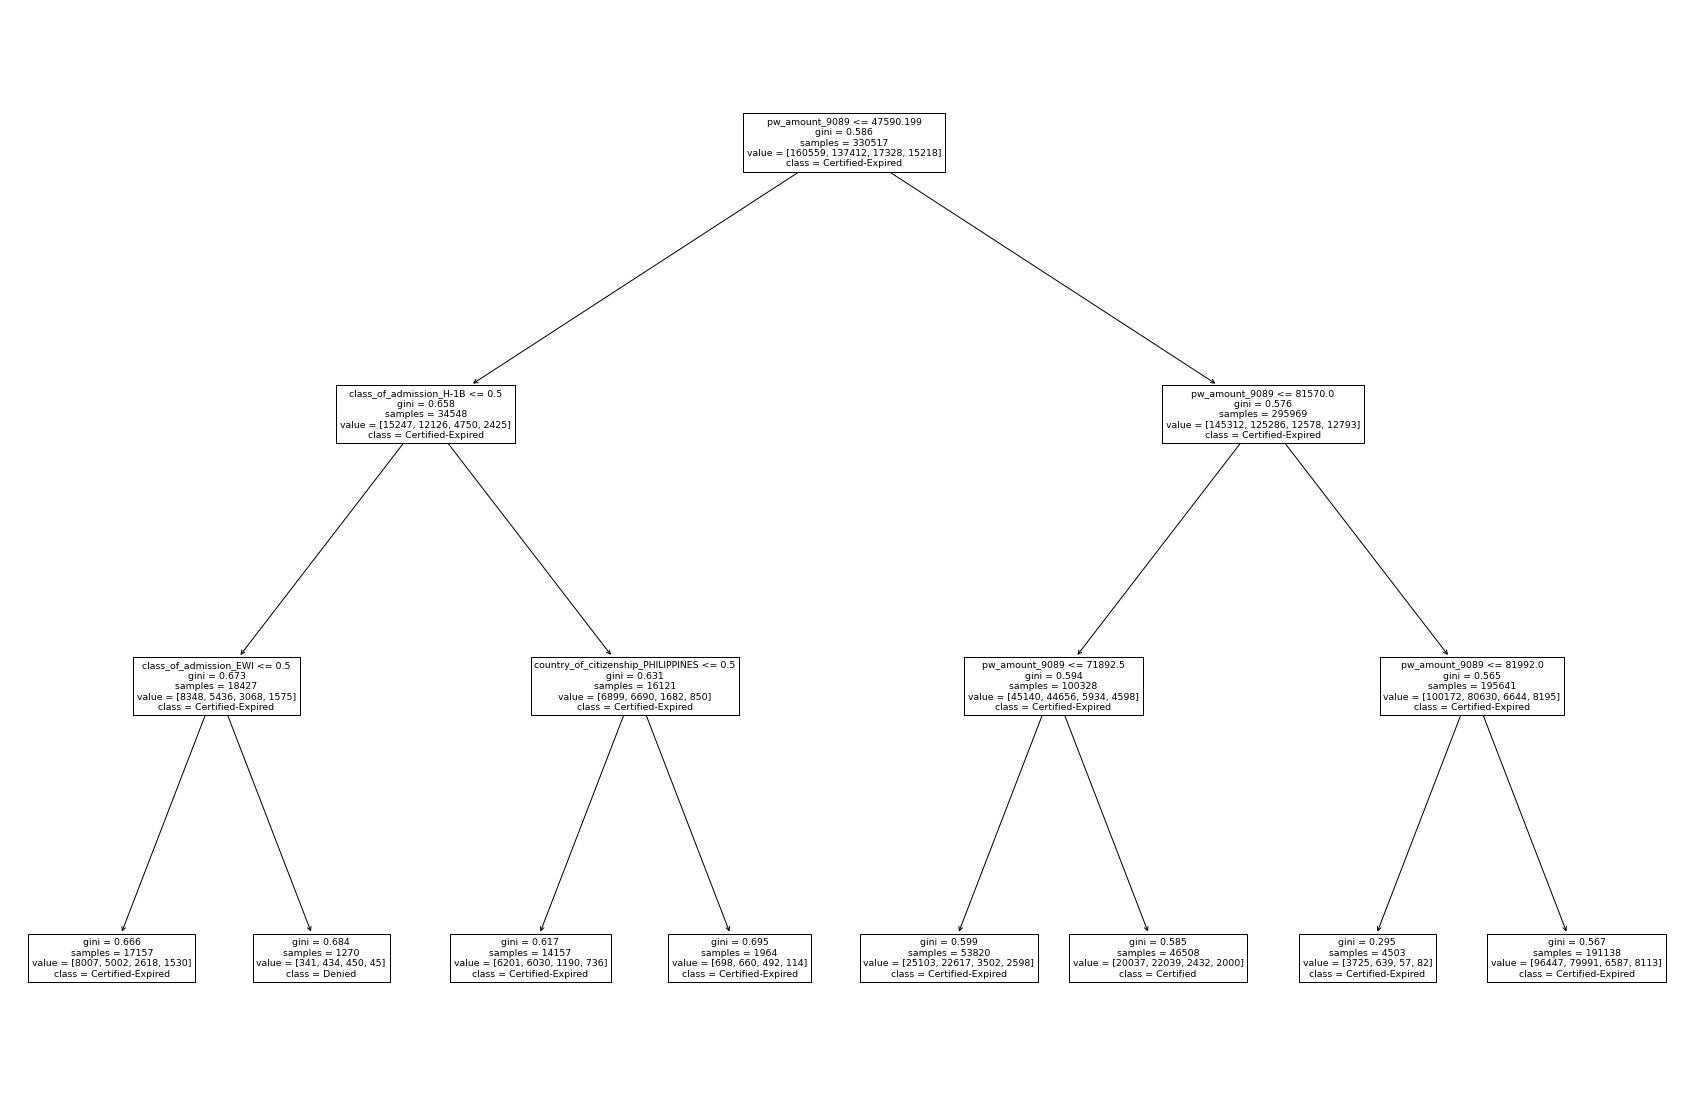

In [15]:
plt.figure(figsize= (30,20))
tree.plot_tree(clf, feature_names = X.columns, class_names = y.unique().tolist())

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node is the one on the lower right corner, which has a sample size of 191138. The classification is 'Certified-Expired'.

Here is how a data point is going to end up in this node:

1. Having a `pw_amount_9089` value larger than 47590.199;

2. Having a `pw_amount_9089` value larger than 81570.0;

3. Having a `pw_amount_9089` value larger than 81992.0.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
max_depths = [1,2,3]
outputs = []

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth= md)
  clf.fit(X_train,y_train)
  oos_accuracy = clf.score(X_test, y_test)  #Calculate Out of Sample accuracy 
  outputs.append(oos_accuracy)

In [18]:
print(f'The best max_depth for out-of sample accuracy is {max_depths[outputs.index(max(outputs))]}.')

The best max_depth for out-of sample accuracy is 3.
